# Corpus thèse
Léa Maronet

In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
corpus = pd.read_csv("Corpus.csv")
corpus

,Titre,État,Région historique,Site,Sujet,Motifs,Date,Support,Affiliation religieuse,Lieu de conservation,Auteur,Citation bibliographique,Inscription
0,ASOK_AMA001,Andhra Pradesh,Andhradeśa,Amarāvatī,Balustrade avec médaillons lotiformes,lotus,1 A.D. ; 2 A.D. ; 3 A.D.,Stūpa ; balustrade ; pilier,bouddhisme,The British Museum,Maronet Léa,NaN,NaN
1,ASOK_AMA002,Andhra Pradesh,Andhradeśa,Amarāvatī,Pilier de balustrade avec médaillons lotiforme...,lotus,1 A.D. ; 2 A.D. ; 3 A.D.,Stūpa ; balustrade ; pilier,bouddhisme,The British Museum,Maronet Léa,NaN,NaN
2,ASOK_AMA003,Andhra Pradesh,Andhradeśa,Amarāvatī,Pilier de balustrade avec médaillons lotiforme...,lotus ; éléphant,1 A.D. ; 2 A.D. ; 3 A.D.,Stūpa ; balustrade ; pilier,bouddhisme,The British Museum,Maronet Léa,NaN,NaN
3,ASOK_AMA004,Andhra Pradesh,Andhradeśa,Amarāvatī,Pilier de balustrade avec médaillons lotiforme...,lotus,1 A.D. ; 2 A.D. ; 3 A.D.,Stūpa ; balustrade ; pilier,bouddhisme,The British Museum,Maronet Léa,NaN,NaN
4,ASOK_AMA005,Andhra Pradesh,Andhradeśa,Amarāvatī,Pilier de balustrade avec médaillons lotiforme...,lotus,1 A.D. ; 2 A.D. ; 3 A.D.,Stūpa ; balustrade ; pilier,bouddhisme,The British Museum,Maronet Léa,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,ASOK_GAN048,Gandhāra,Gandhāra,Gandhāra (site inconnu),Vignes et oiseau,oiseau,3 A.D.,Frise,bouddhisme,Peshawar Museum,Martin Agnès,NaN,NaN
689,ASOK_GAN049,Gandhāra,Gandhāra,Gandhāra (site inconnu),Pilier d'Aśoka avec taureau,taureau,2 A.D. ; 3 A.D.,Stūpa ; panneau,bouddhisme,Peshawar Museum,Martin Agnès,NaN,NaN
690,ASOK_GAN050,Gandhāra,Gandhāra,Gandhāra (site inconnu),Scène de combat entre Kṛṣṇa et le démon cheval...,cheval,2 A.D. ; 3 A.D.,Poids,brahmanisme,Bahawalpur Museum,Martin Agnès,NaN,NaN
691,ASOK_GAN051,Gandhāra,Gandhāra,Gandhāra (site inconnu),Dévots rendant hommage à un ascète,éléphant,2 A.D. ; 3 A.D.,Stūpa ; panneau,bouddhisme,Bahawalpur Museum,Martin Agnès,NaN,NaN


## Répartition par sites

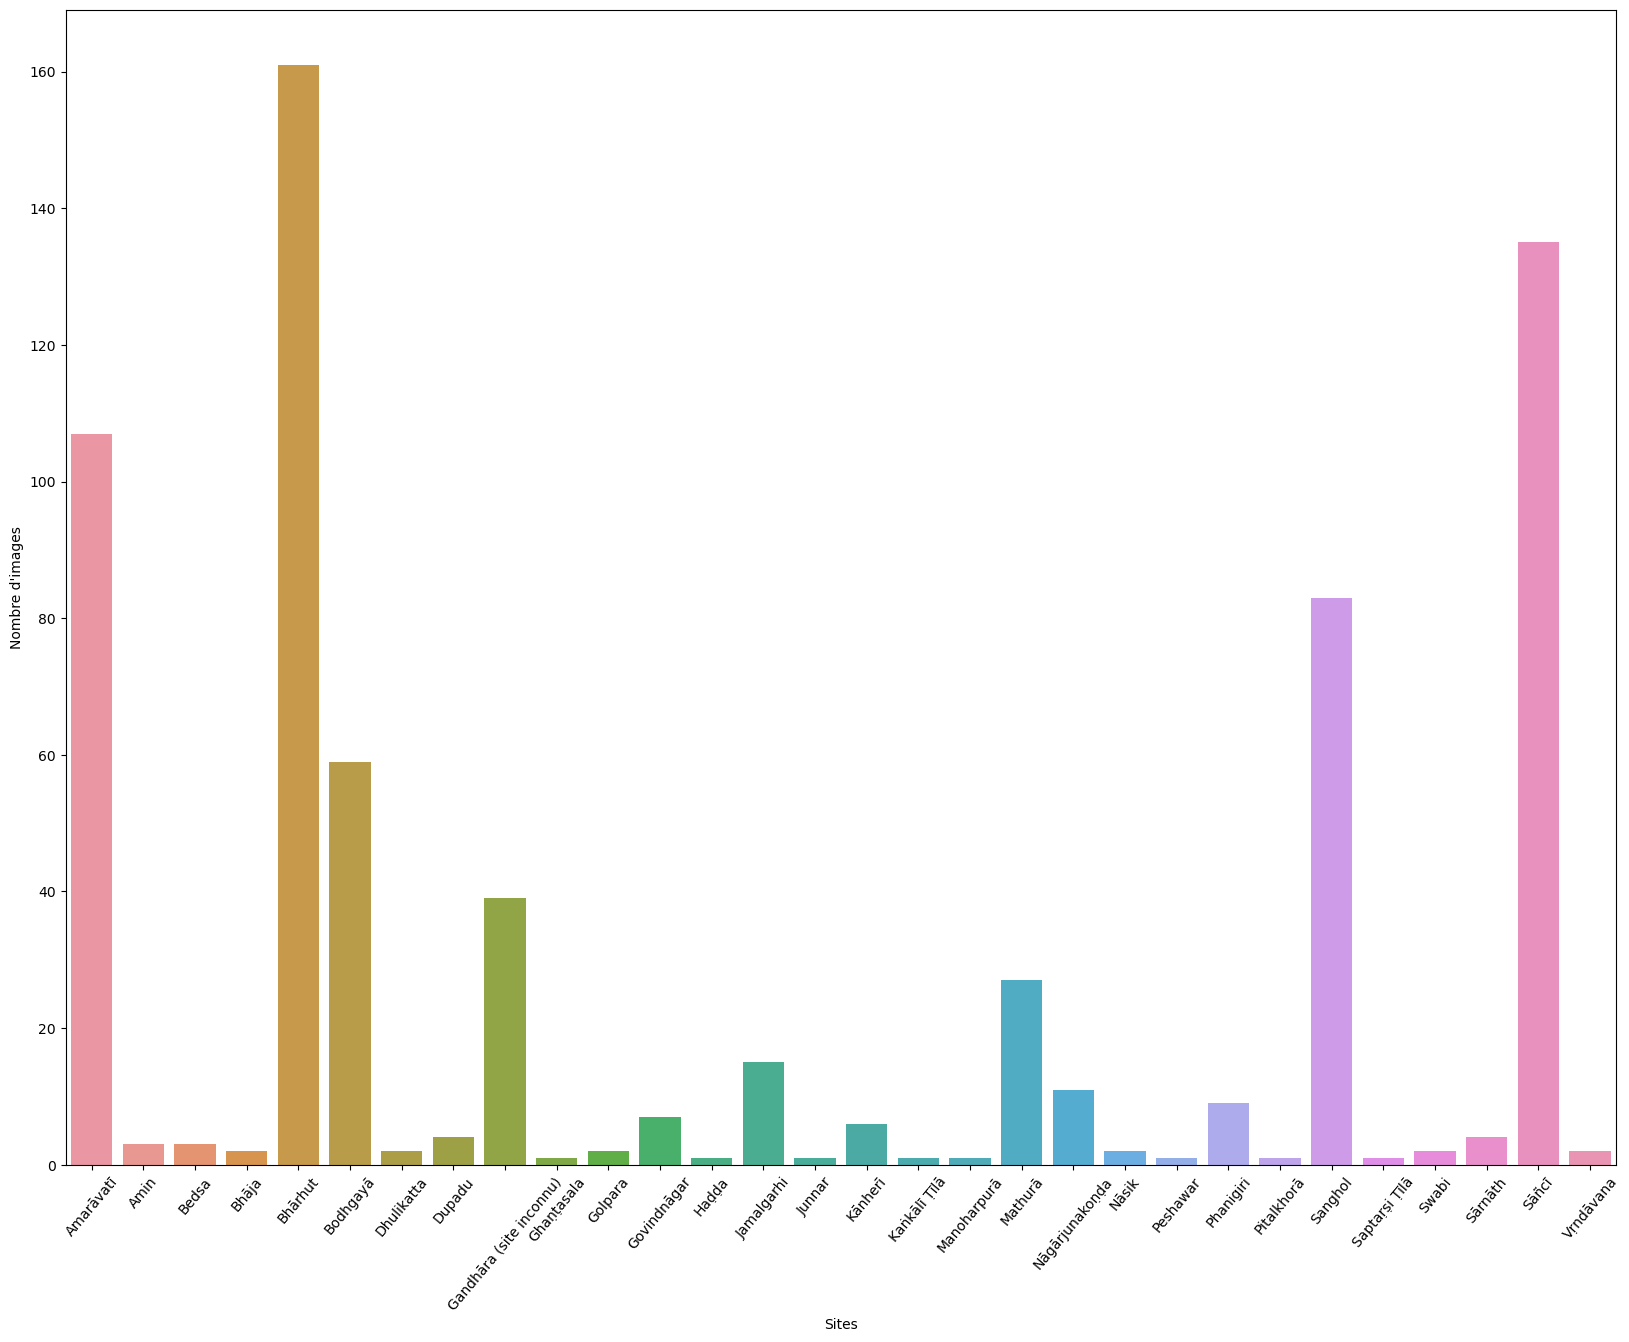

In [3]:
plt.figure(figsize=(20,15))
sns.countplot(corpus.sort_values("Site"), x="Site")
plt.ylabel("Nombre d'images")
plt.xlabel("Sites")
plt.xticks(rotation=50)
plt.show()

## Répartition par régions historiques

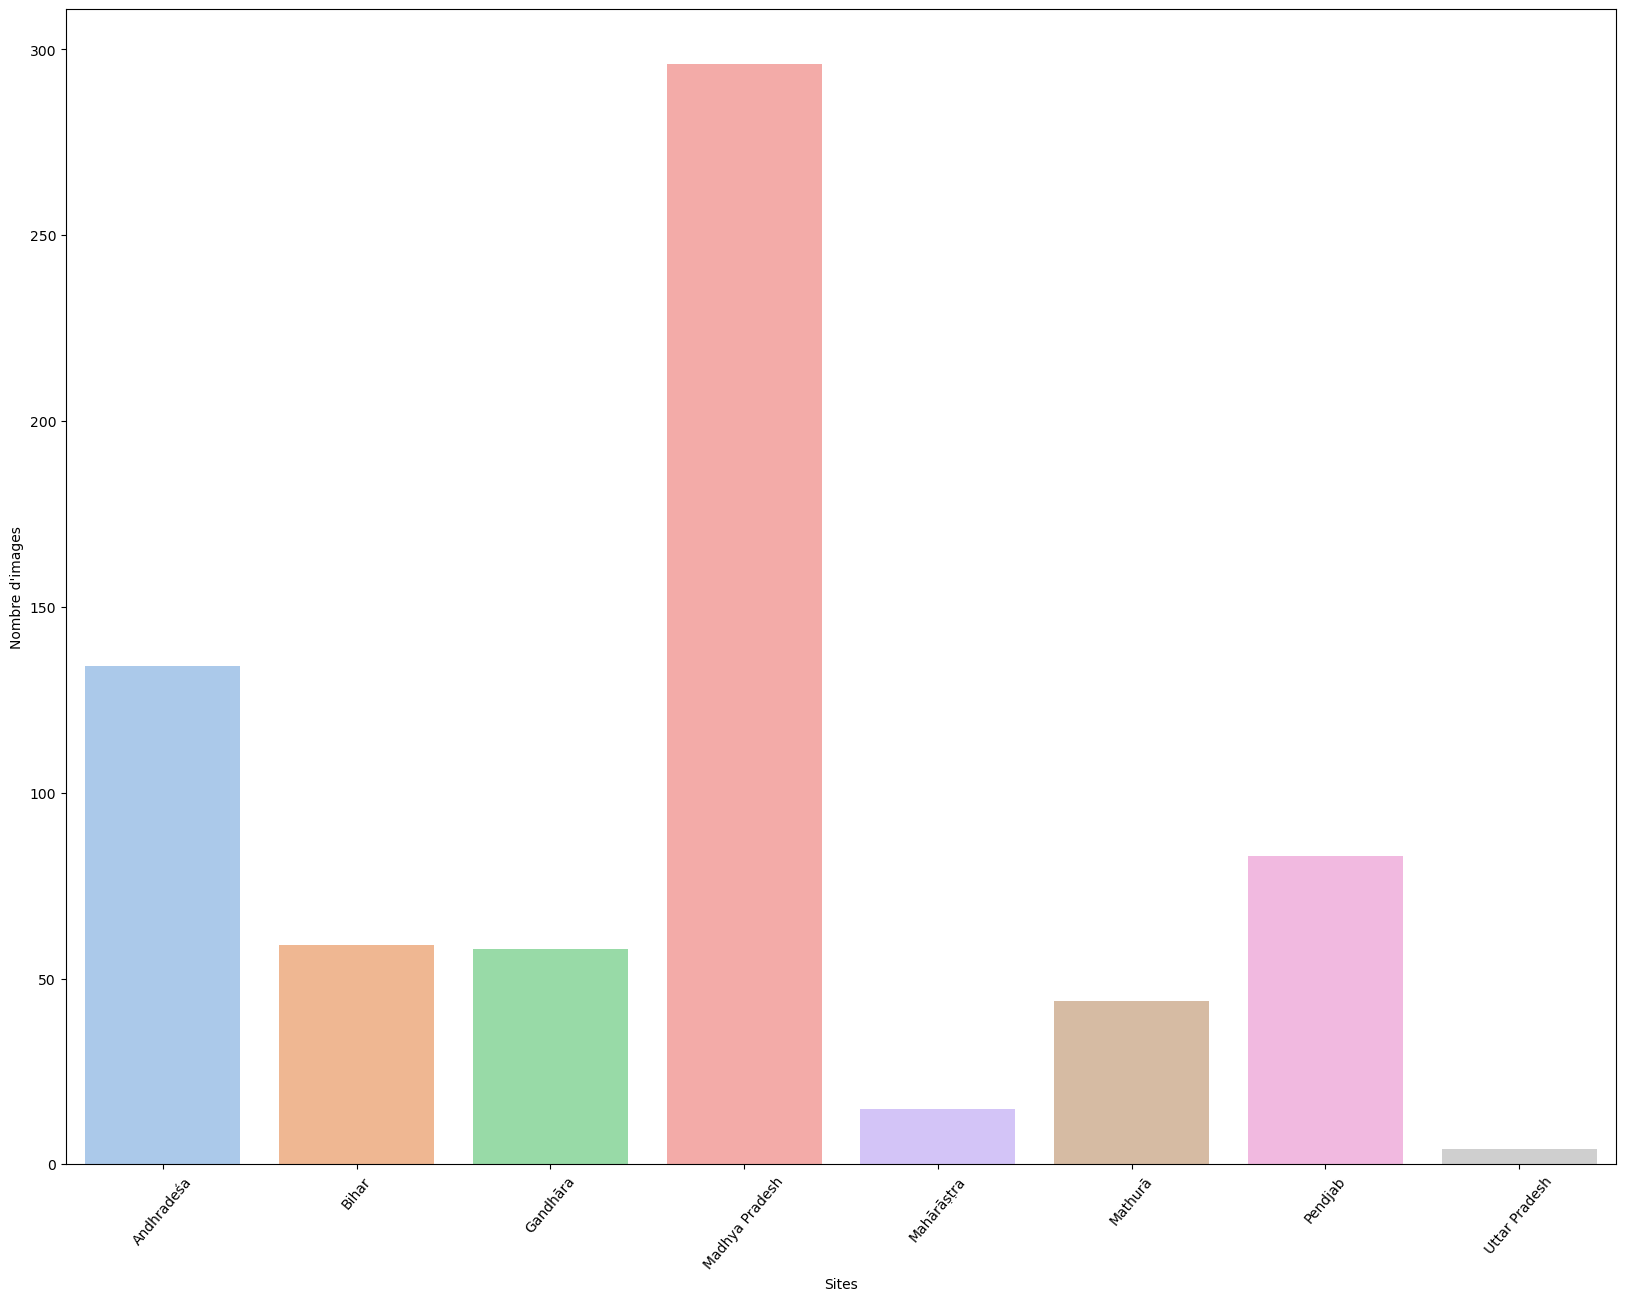

In [4]:
plt.figure(figsize=(20,15))
sns.countplot(corpus.sort_values("Région historique"), x="Région historique", palette="pastel")
plt.ylabel("Nombre d'images")
plt.xlabel("Sites")
plt.xticks(rotation=50)
plt.show()

## Répartition par dates

### Par grandes périodes

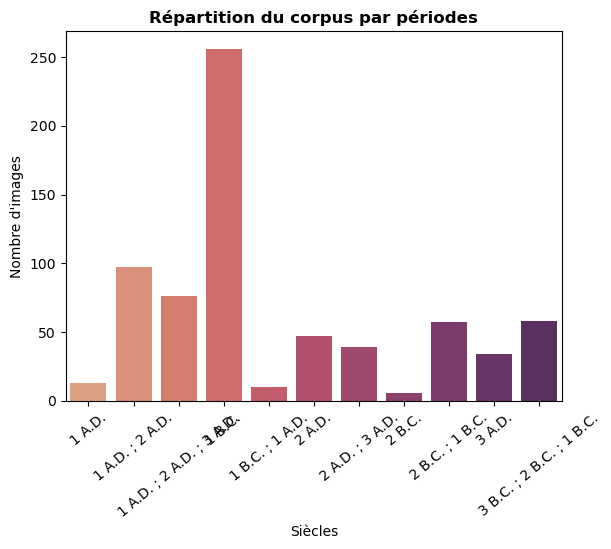

In [5]:
dates = corpus.groupby('Date')['Titre'].count()
dates = dates.reset_index()
sns.barplot(y=dates['Titre'], x=dates['Date'], palette="flare")
plt.ylabel("Nombre d'images")
plt.xlabel("Siècles")
plt.xticks(rotation=40)
plt.title("Répartition du corpus par périodes", fontweight="bold")
plt.show()

In [6]:
dates = dates.rename(columns={'Titre' : 'Occurences'})
dates

,Date,Occurences
0,1 A.D.,13
1,1 A.D. ; 2 A.D.,97
2,1 A.D. ; 2 A.D. ; 3 A.D.,76
3,1 B.C.,256
4,1 B.C. ; 1 A.D.,10
5,2 A.D.,47
6,2 A.D. ; 3 A.D.,39
7,2 B.C.,6
8,2 B.C. ; 1 B.C.,57
9,3 A.D.,34


### Par siècles

In [7]:
#Calcul des occurences
siecles = pd.DataFrame(corpus.Date.str.replace(" ", "").str.split(";").explode().value_counts())
siecles = siecles.reset_index()
siecles = siecles.rename(columns={'count' : 'Occurences'})
siecles

,Date,Occurences
0,1B.C.,381
1,2A.D.,259
2,1A.D.,196
3,3A.D.,149
4,2B.C.,121
5,3B.C.,58


In [8]:
#Tri des siècles par ordre chronologique
conditions = []
valeurs = []

for i,j in enumerate(['3B.C.','2B.C.','1B.C.','1A.D.', '2A.D.', '3A.D.']):
    conditions.append((siecles['Date'] == j))
    valeurs.append(i)

siecles['Tri'] = np.select(conditions, valeurs)
siecles.sort_values(by='Tri',inplace = True)
siecles.drop(columns="Tri")

,Date,Occurences
5,3B.C.,58
4,2B.C.,121
0,1B.C.,381
2,1A.D.,196
1,2A.D.,259
3,3A.D.,149


Text(0.5, 1.0, 'Répartition du corpus par siècles')

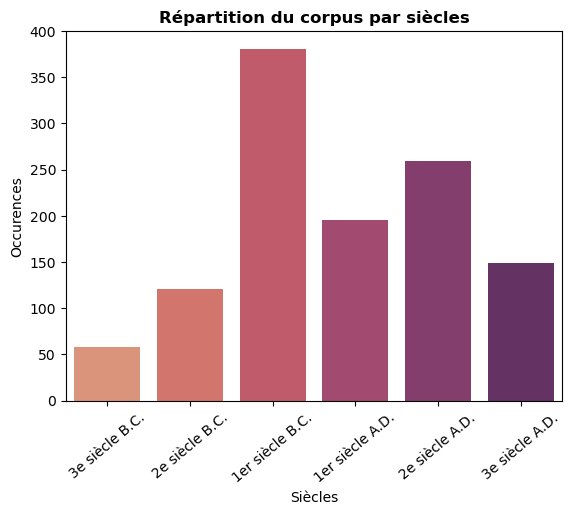

In [9]:
#Création du graphique
noms_siecles = ["3e siècle B.C.", "2e siècle B.C.", "1er siècle B.C.", "1er siècle A.D.", "2e siècle A.D.", "3e siècle A.D."]
sns.barplot(y=siecles['Occurences'], x=siecles['Date'], palette="flare").set(xlabel="Siècles", xticklabels=noms_siecles)
plt.xticks(rotation=40)
plt.title("Répartition du corpus par siècles", fontweight="bold")

## Occurence des motifs

### Dans l'ensemble du corpus

In [10]:
motifs = pd.DataFrame(corpus.Motifs.str.replace(" ", "").str.split(";").explode().value_counts())
motifs = motifs.reset_index()
motifs = motifs.rename(columns={'count' : 'Occurences'})
motifs

,Motifs,Occurences
0,lotus,614
1,éléphant,77
2,lion,65
3,cheval,40
4,oiseau,28
5,taureau,20
6,lotuslotus,1


Text(0.5, 1.0, 'Répartition des motifs au sein du corpus')

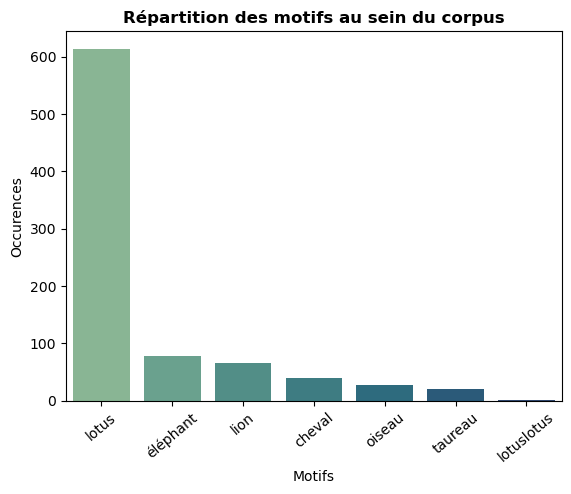

In [11]:
sns.barplot(y=motifs['Occurences'], x=motifs['Motifs'], palette="crest")
plt.xticks(rotation=40)
plt.title("Répartition des motifs au sein du corpus", fontweight="bold")

### Par région historique

In [24]:
#Récupération des noms des régions
noms_regions = list(corpus.rename(columns={"Région historique" : "Région"}).sort_values("Région").Région.unique())
noms_regions

['Andhradeśa',
 'Bihar',
 'Gandhāra',
 'Madhya Pradesh',
 'Mahārāṣṭra',
 'Mathurā',
 'Pendjab',
 'Uttar Pradesh']

In [25]:
#Création d'un dataframe avec le nombre de motifs par région

motifs_regions = pd.DataFrame()
corpus_trie = corpus.rename(columns={"Région historique" : "Région"})

for region in noms_regions:
    motifs_regions[region] = corpus_trie.loc[corpus_trie["Région"] == region].Motifs.str.replace(" ", "").str.split(";").explode().value_counts()

motifs_regions.reset_index(inplace=True)
motifs_regions

,Motifs,Andhradeśa,Bihar,Gandhāra,Madhya Pradesh,Mahārāṣṭra,Mathurā,Pendjab,Uttar Pradesh
0,lotus,94,59,34,294,11.0,42,76.0,4.0
1,lion,37,1,2,18,NaN,3,3.0,1.0
2,éléphant,18,3,5,42,5.0,2,2.0,NaN
3,cheval,14,3,12,9,NaN,1,1.0,NaN
4,oiseau,11,1,2,12,NaN,1,1.0,NaN
5,taureau,8,1,4,6,NaN,1,NaN,NaN


In [26]:
#Réarrangement du dataframe
motifs_regions = motifs_regions.melt(id_vars="Motifs")

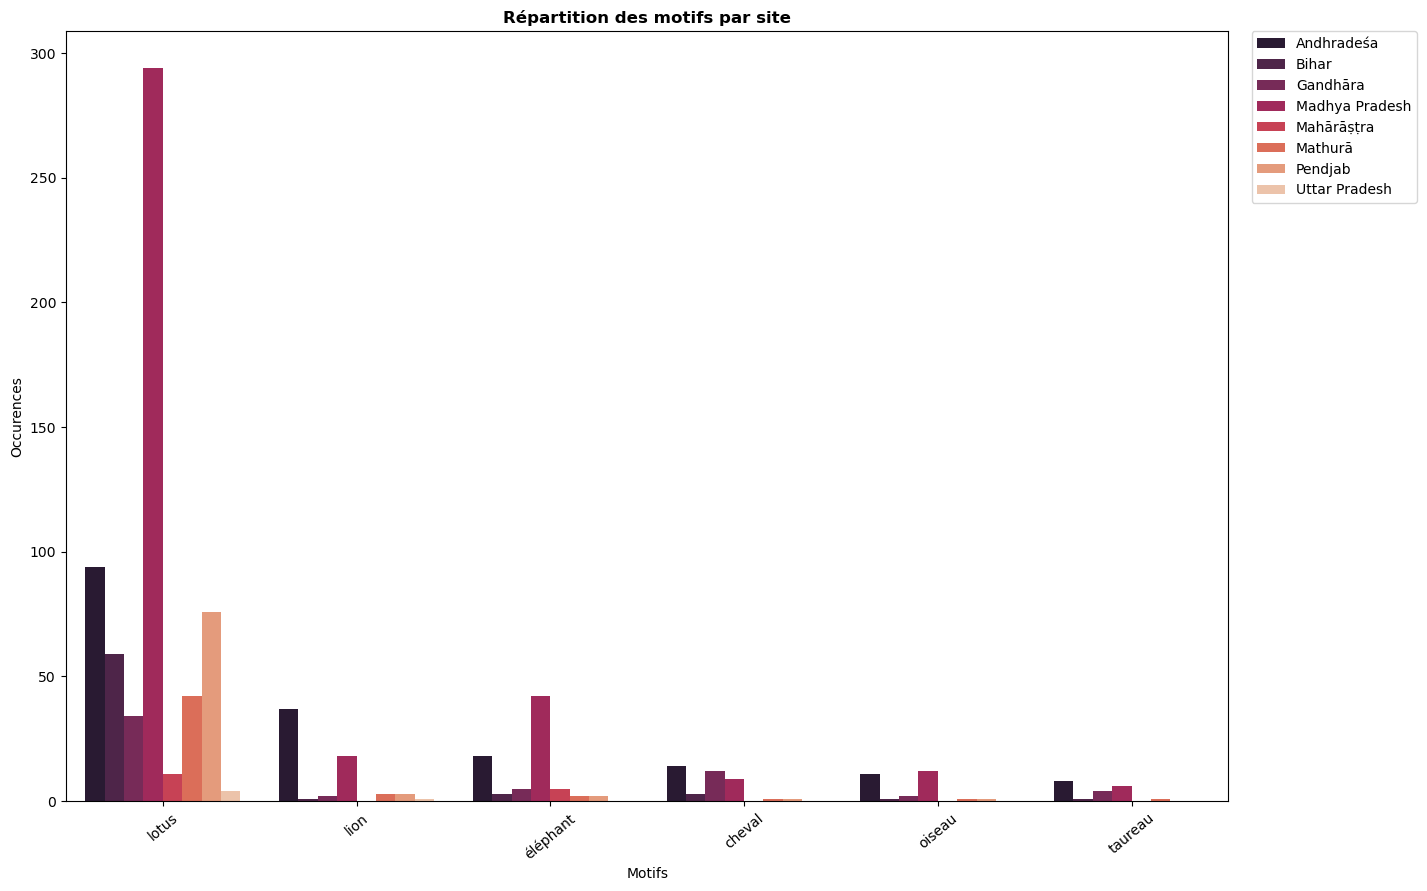

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(data=motifs_regions, x='Motifs', y='value', hue='variable', errorbar=None, palette="rocket")
plt.xticks(rotation=40)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("Occurences")
plt.title("Répartition des motifs par site", fontweight="bold")
plt.show()

### Par site

In [30]:
#Récupération des noms des sites
noms_sites = list(corpus.sort_values("Site").Site.unique())
noms_sites 

['Amarāvatī',
 'Amin',
 'Bedsa',
 'Bhāja',
 'Bhārhut',
 'Bodhgayā',
 'Dhulikatta',
 'Dupadu',
 'Gandhāra (site inconnu)',
 'Ghaṇṭasala',
 'Golpara',
 'Govindnāgar',
 'Haḍḍa',
 'Jamalgarhi',
 'Junnar',
 'Kānherī',
 'Kaṅkālī Ṭīlā',
 'Manoharpurā',
 'Mathurā',
 'Nāgārjunakoṇḍa',
 'Nāsik',
 'Peshawar',
 'Phanigiri',
 'Pitalkhorā',
 'Sanghol',
 'Saptaṛṣi Ṭīlā',
 'Swabi',
 'Sārnāth',
 'Sāñcī',
 'Vṛndāvana']

In [31]:
#Création d'un dataframe avec le nombre de motifs par site

motifs_sites = pd.DataFrame()

for site in noms_sites:
    motifs_sites[site] = corpus.loc[corpus["Site"] == site].Motifs.str.replace(" ", "").str.split(";").explode().value_counts()

motifs_sites.reset_index(inplace=True)
motifs_sites

,Motifs,Amarāvatī,Amin,Bedsa,Bhāja,Bhārhut,Bodhgayā,Dhulikatta,Dupadu,Gandhāra (site inconnu),...,Nāsik,Peshawar,Phanigiri,Pitalkhorā,Sanghol,Saptaṛṣi Ṭīlā,Swabi,Sārnāth,Sāñcī,Vṛndāvana
0,lotus,73,3.0,3.0,2.0,160.0,59,2.0,1.0,29.0,...,2.0,1.0,7.0,1.0,76.0,1.0,2.0,4.0,134,2.0
1,lion,27,NaN,NaN,NaN,1.0,1,NaN,3.0,NaN,...,NaN,NaN,3.0,NaN,3.0,NaN,NaN,1.0,17,NaN
2,éléphant,15,NaN,NaN,NaN,4.0,3,NaN,NaN,2.0,...,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,38,NaN
3,cheval,12,NaN,NaN,NaN,NaN,3,NaN,1.0,5.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,9,NaN
4,oiseau,9,NaN,NaN,NaN,3.0,1,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,9,NaN
5,taureau,6,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,6,NaN


In [32]:
#Réarrangement du dataframe
motifs_sites = motifs_sites.melt(id_vars="Motifs")

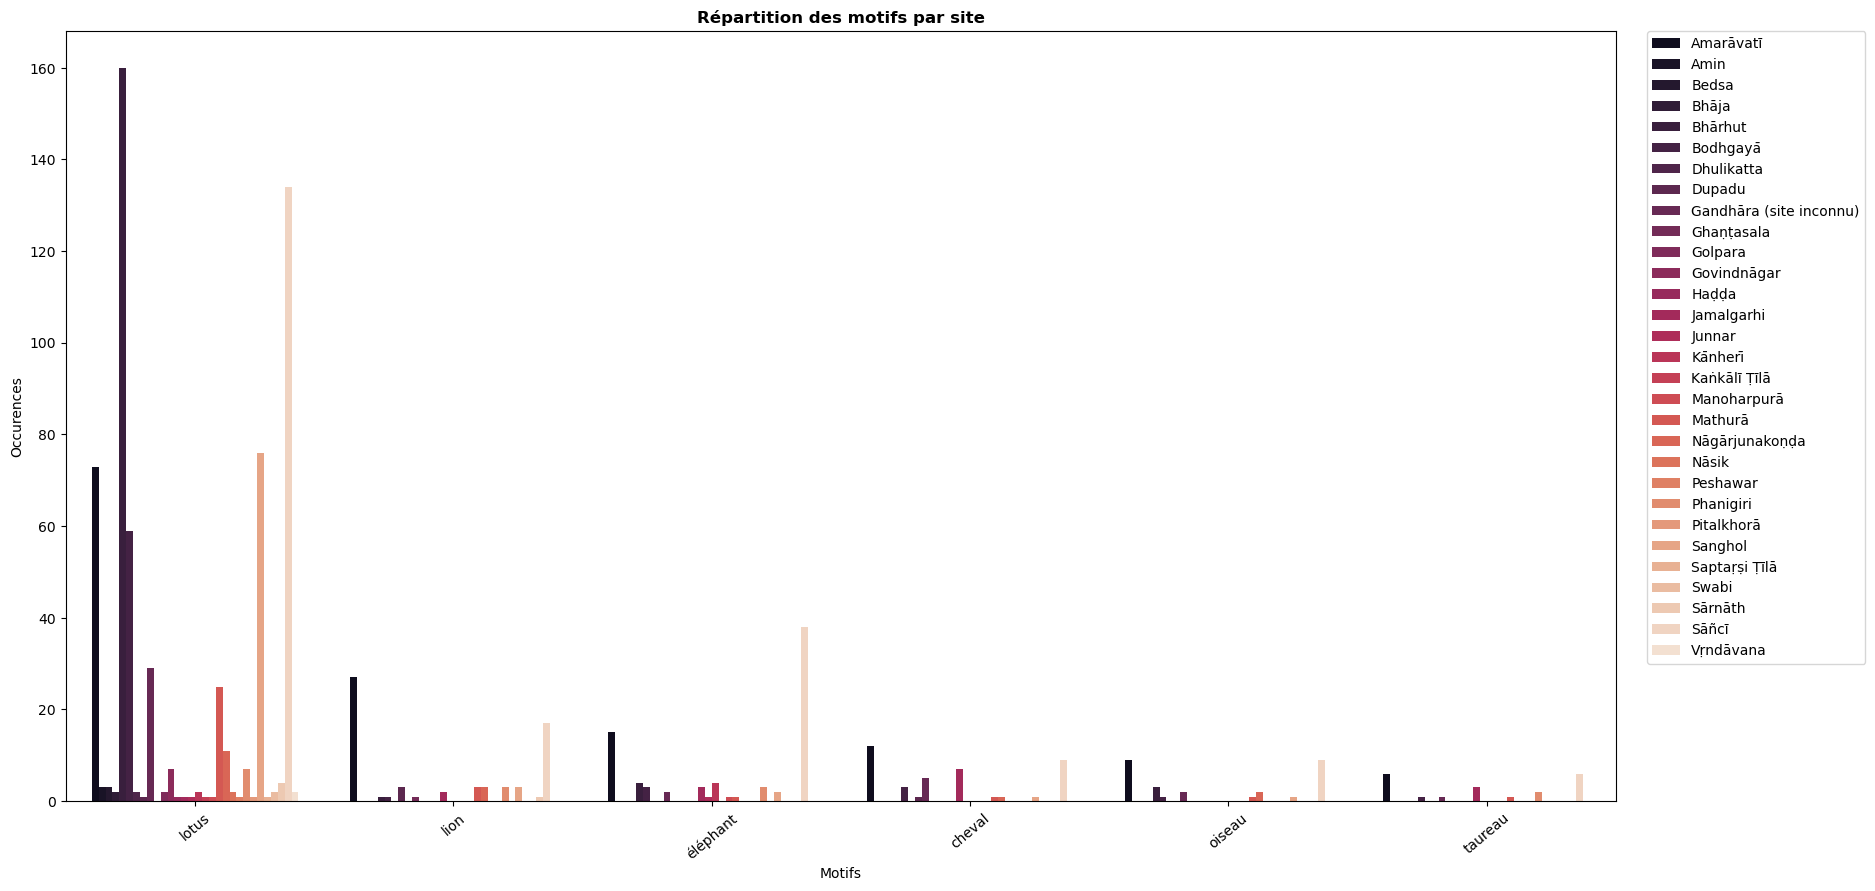

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(data=motifs_sites, x='Motifs', y='value', hue='variable', errorbar=None, palette="rocket")
plt.xticks(rotation=40)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("Occurences")
plt.title("Répartition des motifs par site", fontweight="bold")
plt.show()